# 21대 총선 데이터 분석

- 중앙선거여론조사심의위원회에 등록된 여론조사 데이터 사용
    - > https://www.nesdc.go.kr/portal/main.do
- 각 지역구별 가장 최신 날짜의 데이터 (동일 날짜인 경우 최상단에 있는 파일 사용)

In [1]:
import pandas as pd

In [5]:
df = pd.read_excel('../data/korea_map_21th_election_type_b_survey.xlsx')
df.head()

,X,Y,표기이름,선거구명 전체,지역구_정당,지역구_이름,지역구_지지도,지역구_정당.1,지역구_이름.1,지역구_지지도.1,여론조사 공표날짜,여론조사 링크,비고
0,12,1,강릉시,강원 강릉시,더불어민주당,김경구,33.9,미래통합당,홍윤식,13.6,2020-04-10,https://www.nesdc.go.kr/portal/bbs/B0000005/vi...,NaN
1,12,2,동해 태백\n삼척 정선,강원 동해시태백시삼척시정선군,미래통합당,이철규,40.3,더불어민주당,김동완,36.2,2020-04-08,https://www.nesdc.go.kr/portal/bbs/B0000005/vi...,NaN
2,11,0,속초 인제\n고성 양양,강원 속초시인제군고성군양양군,미래통합당,이양수,42.2,더불어민주당,이동기,38.1,2020-04-08,https://www.nesdc.go.kr/portal/bbs/B0000005/vi...,NaN
3,10,1,원주 갑,강원 원주시갑,더불어민주당,이광재,47.6,미래통합당,박정하,26.6,2020-04-10,https://www.nesdc.go.kr/portal/bbs/B0000005/vi...,NaN
4,11,2,원주 을,강원 원주시을,더불어민주당,송기현,53.3,미래통합당,이강후,31.4,2020-04-08,https://www.nesdc.go.kr/portal/bbs/B0000005/vi...,NaN


In [18]:
# 지역구 여론조사 1등 정당 명

df['지역구_정당'].unique()

array(['더불어민주당', '미래통합당', '정의당', nan, '무소속'], dtype=object)

In [19]:
# 지역구 여론조사 2등 정당 명

df['지역구_정당.1'].unique()

array(['미래통합당', '더불어민주당', nan, '무소속', '민생당'], dtype=object)

In [12]:
df['지지도차이'] = abs(df['지역구_지지도'] - df['지역구_지지도.1'])
df.head()

,X,Y,표기이름,선거구명 전체,지역구_정당,지역구_이름,지역구_지지도,지역구_정당.1,지역구_이름.1,지역구_지지도.1,여론조사 공표날짜,여론조사 링크,비고,지지도차이,우세
0,12,1,강릉시,강원 강릉시,더불어민주당,김경구,33.9,미래통합당,홍윤식,13.6,2020-04-10,https://www.nesdc.go.kr/portal/bbs/B0000005/vi...,NaN,20.3,우세
1,12,2,동해 태백\n삼척 정선,강원 동해시태백시삼척시정선군,미래통합당,이철규,40.3,더불어민주당,김동완,36.2,2020-04-08,https://www.nesdc.go.kr/portal/bbs/B0000005/vi...,NaN,4.1,NaN
2,11,0,속초 인제\n고성 양양,강원 속초시인제군고성군양양군,미래통합당,이양수,42.2,더불어민주당,이동기,38.1,2020-04-08,https://www.nesdc.go.kr/portal/bbs/B0000005/vi...,NaN,4.1,NaN
3,10,1,원주 갑,강원 원주시갑,더불어민주당,이광재,47.6,미래통합당,박정하,26.6,2020-04-10,https://www.nesdc.go.kr/portal/bbs/B0000005/vi...,NaN,21.0,우세
4,11,2,원주 을,강원 원주시을,더불어민주당,송기현,53.3,미래통합당,이강후,31.4,2020-04-08,https://www.nesdc.go.kr/portal/bbs/B0000005/vi...,NaN,21.9,우세


In [16]:
df.loc[df['지지도차이'] >= 7.5, '우세'] = '우세'
df.loc[df['우세'].isna(), '우세'] = '경합'

In [23]:
# 우세 지역구
df[df['우세'] == '우세']['지역구_정당'].value_counts()

더불어민주당    68
미래통합당     30
정의당        1
무소속        1
Name: 지역구_정당, dtype: int64

In [24]:
# 경합 지역구
df[df['우세'] == '경합']['지역구_정당'].value_counts()

더불어민주당    31
미래통합당     27
무소속        2
Name: 지역구_정당, dtype: int64

In [85]:
# 전체 지역구
df['지역구_정당'].value_counts(dropna=False)

더불어민주당    99
NaN       93
미래통합당     57
무소속        3
정의당        1
Name: 지역구_정당, dtype: int64

In [72]:
color = {
    '더불어민주당':'#1a4fa2',
    '미래통합당':'#ef426f',
    '정의당':'#facc03',
    '무소속':'#869ba5',
    'nan':'#ffffff'
}

In [73]:
for col in ['더불어민주당', '미래통합당', '정의당', '무소속']:
    df.loc[df['지역구_정당'] == col, 'color'] = color[col]

In [74]:
df.loc[df['지역구_정당'].isna(), 'color'] = '#ffffff'

In [75]:
for num, col in enumerate(['더불어민주당', '미래통합당', '정의당', '무소속']):
    df.loc[df['지역구_정당'] == col, 'SUCCESSFUL'] = num
df.loc[df['지역구_정당'].isna(), 'SUCCESSFUL'] = 4

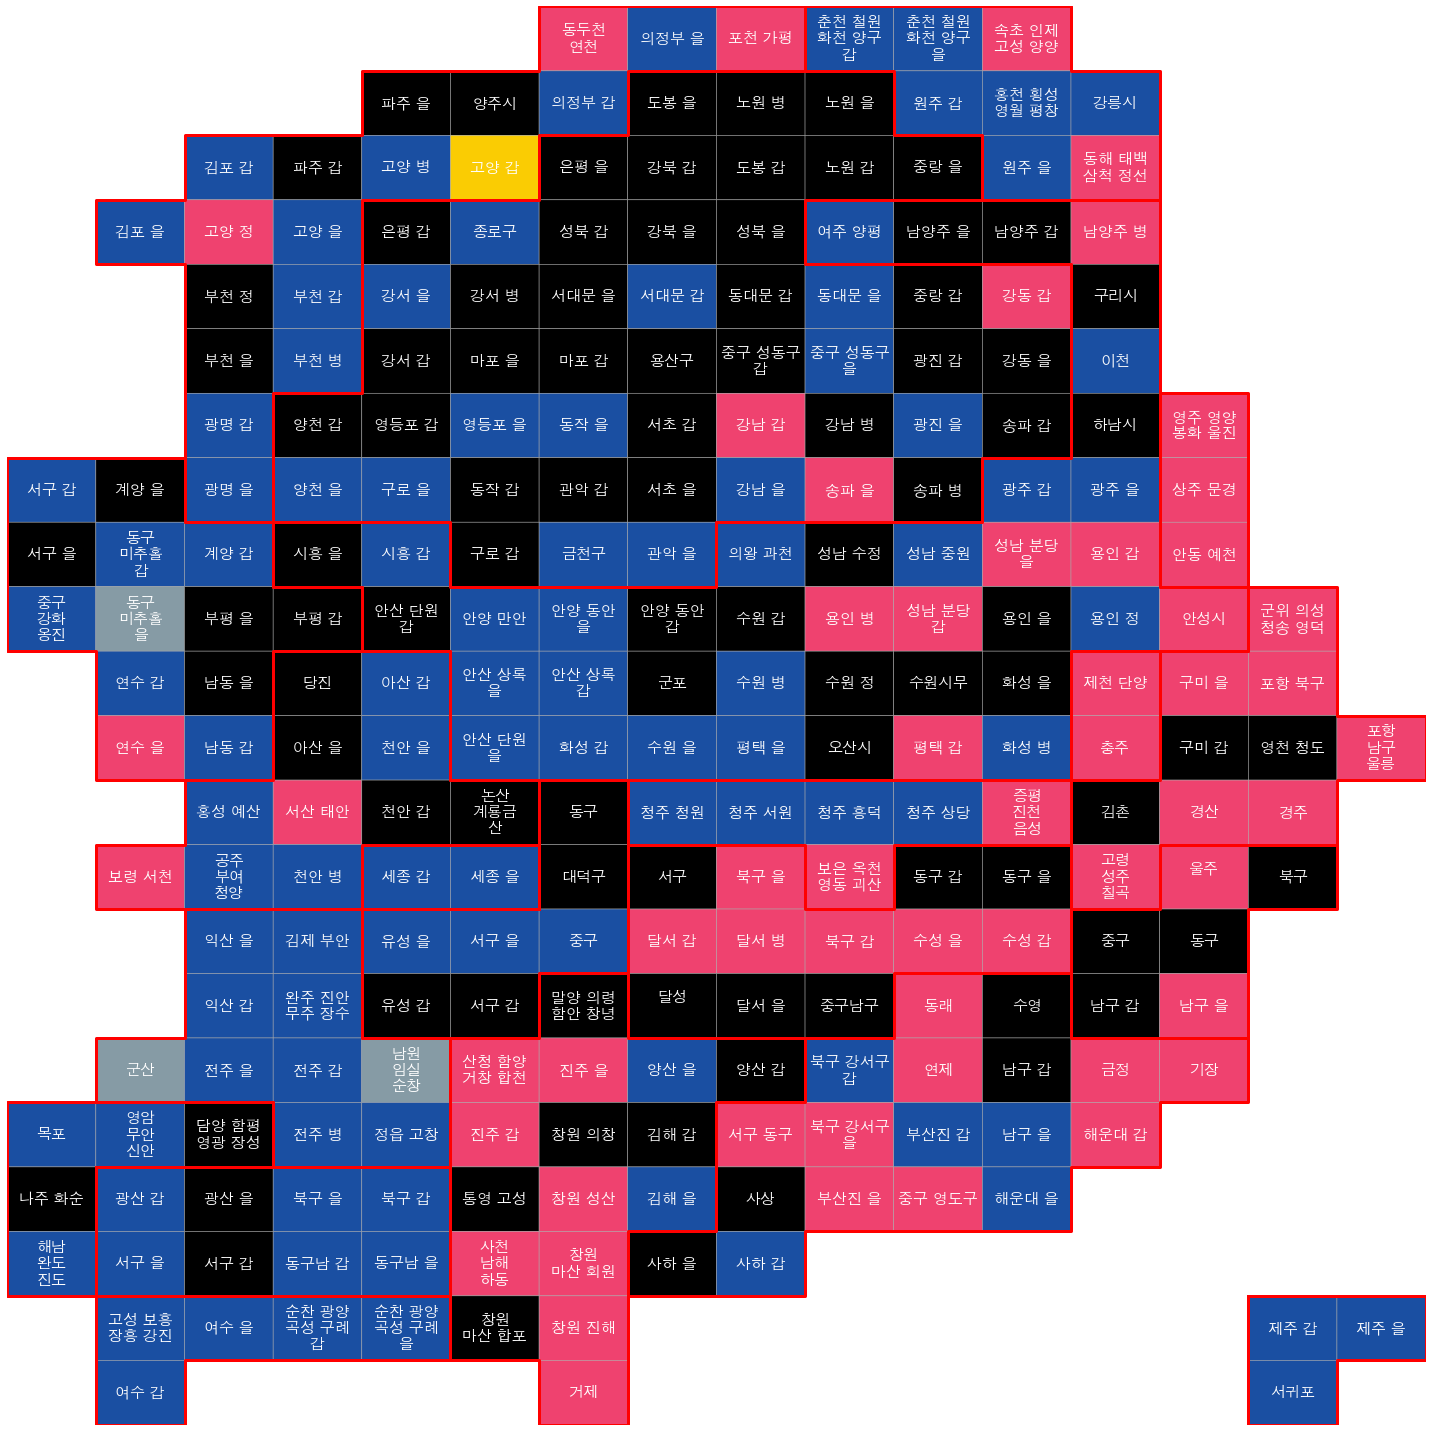

In [88]:
BORDER_LINES = [
    [[1, 1, 5, 5, 1], [18, 20, 20, 18, 18]],# 광주광역시
    [[1, 2, 2, 5, 5, 1, 1, 3, 3, 0, 0, 1, 1], [22, 22, 21, 21, 20, 20, 18, 18, 17, 17, 20, 20, 22]],# 전라남도
    [[14, 14, 15, 15, 16, 16, 16, 14], [20, 22, 22, 21, 21, 21, 20, 20]],# 제주도
    [[2, 2, 1, 1, 3, 3, 5, 5, 4, 4, 2], [14, 16, 16, 17, 17, 18, 18, 16, 16, 14, 14]],# 전라북도
    [ [4, 4, 6, 6, 7, 7, 6, 6, 4], [14, 16, 16, 15, 15, 12, 12, 14, 14]],# 대전광역시
    [[4, 4, 6, 6], [14, 13, 13, 14]],# 세종특별시
    [[2, 1, 1, 2, 2, 3, 3, 5, 5, 6, 6], [14, 14, 13, 13, 12, 12, 10, 10, 12, 12, 13]],# 충청남도
    [[2, 1, 1, 0, 0, 2, 2, 3, 3, 4, 4] , [12, 12, 10, 10, 7, 7, 8, 8, 9, 9, 10]], # 인천광역시
    [[9, 9, 6, 6, 5, 4, 4, 2, 2, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 12, 12, 14, 14, 13, 13],
    [1, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4, 8, 8, 9, 9, 10, 10, 12, 12, 12, 10, 10, 9, 9, 3]], # 경기도
    [[13, 9, 9, 12, 12, 11, 11, 8, 8, 5, 5, 3, 3, 4, 4, 6, 6, 7, 7, 9],
     [3, 3, 4, 4, 7, 7, 8, 8, 9, 9, 8, 8, 6, 6, 3, 3, 2, 2, 1, 1]], # 경기도
    [[9, 10, 10, 11, 11, 13, 13, 12, 12, 9],
     [1, 1, 2, 2, 3, 3, 1, 1, 0, 0]], # 강원도
    [[5, 6, 6, 7, 7, 8, 8, 9, 9, 7, 7],
     [21, 21, 22, 22, 19, 19, 17, 17, 16, 16, 15]], # 경상남도
    [[7, 9, 9, 12, 12, 13, 13, 14, 14, 12, 12, 10, 10, 9],
     [20, 20, 19, 19, 18, 18, 17, 17, 16, 16, 15, 15, 16, 16]], # 부산광역시
    [[7, 9, 9, 10, 10, 12, 12], [13, 13, 14, 14, 13, 13, 15]], # 대구광역시
    [[12, 13, 13, 15, 15, 14, 14], [14, 14, 13, 13, 14, 14, 16]], # 울산광역시
    [[12, 12, 13, 13, 14, 14, 13, 13, 14, 14, 15, 15, 16, 16, 15, 15],
     [13, 12, 12, 10, 10, 9, 9, 6, 6, 9, 9, 11, 11, 12, 12, 13]], # 경상북도
]

mapdata = df.pivot_table(index='Y', columns='X', values='SUCCESSFUL', aggfunc='first')
plt.figure(figsize=(20, 20))

plt.pcolor(mapdata, cmap=cm, edgecolor='#aaaaaa', linewidth=0.5)

for idx, row in df.iterrows():
    name = row['표기이름']
    plt.annotate(name, (row['X']+0.5, row['Y']+0.5), weight='bold',
                 fontsize=15, ha='center', va='center', color='white')

for path in BORDER_LINES:
    x, y = path
    plt.plot(x, y, c='red', lw=3)
    
plt.gca().invert_yaxis()

plt.axis('off')
plt.tight_layout()
plt.savefig('../여론조사결과.png')

In [77]:
from matplotlib.colors import LinearSegmentedColormap
cm = LinearSegmentedColormap.from_list('election', cmaps, N=5)

In [71]:
cmaps = list(color.values())
cmaps

['#1a4fa2', '#ef426f', '#facc03', '#869ba5', '#000000']

In [79]:
import platform

import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False